In [9]:
import pandas as pd

# Load dataset
data = pd.read_csv("insurance.csv")

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


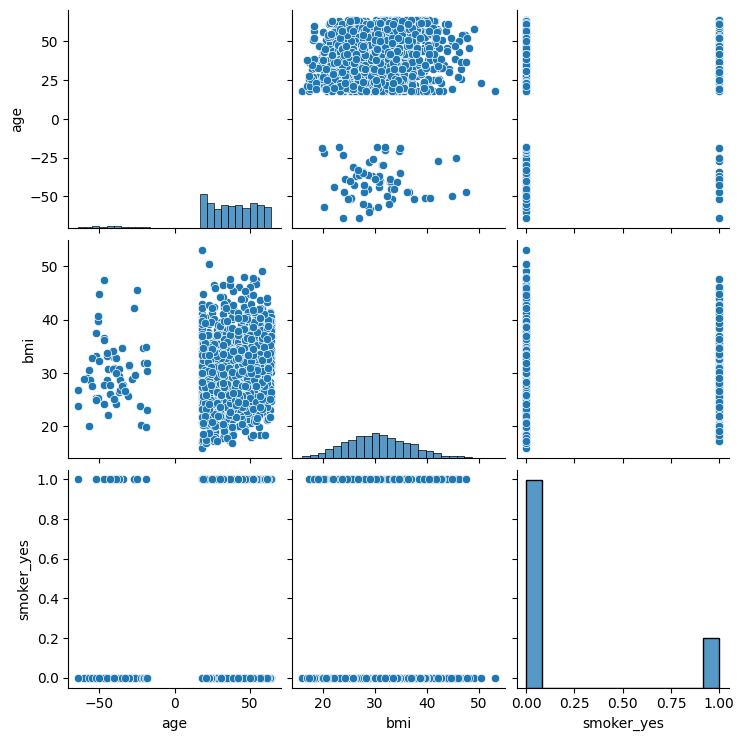

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['age', 'bmi', 'charges', 'smoker_yes']])
plt.show()


In [11]:
# Remove dollar signs and commas from 'charges' and convert to float
data['charges'] = data['charges'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv("insurance.csv")

# Clean 'charges' column if formatted with dollar signs
data['charges'] = data['charges'].replace('[\$,]', '', regex=True).astype(float)

# Drop or fill missing values
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split features and target
X = data.drop("charges", axis=1)
y = data["charges"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.8154275144198488


In [13]:
# Load validation dataset
validation_data = pd.read_csv("validation_dataset.csv")

# Handle any missing values
validation_data = validation_data.dropna()

# Encode categorical columns like in training
validation_data = pd.get_dummies(validation_data, drop_first=True)

# Align columns to match training data
validation_data = validation_data.reindex(columns=X.columns, fill_value=0)

# Predict charges
predicted_charges = model.predict(validation_data)

# Ensure minimum charge of 1000
predicted_charges = [max(1000, pred) for pred in predicted_charges]

# Add predictions to the DataFrame
validation_data["predicted_charges"] = predicted_charges

# Display first few predictions
print(validation_data.head())


    age        bmi  children  sex_M  sex_female  sex_male  sex_man  sex_woman  \
0  18.0  24.090000       1.0      0           0     False        0          0   
1  39.0  26.410000       0.0      0           0      True        0          0   
2  27.0  29.150000       0.0      0           0      True        0          0   
3  71.0  65.502135      13.0      0           0      True        0          0   
4  28.0  38.060000       0.0      0           0      True        0          0   

   smoker_yes  region_Northwest  region_Southeast  region_Southwest  \
0       False                 0                 0                 0   
1        True                 0                 0                 0   
2        True                 0                 0                 0   
3        True                 0                 0                 0   
4       False                 0                 0                 0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0        

In [14]:
# streamlit_app.py
import streamlit as st
import joblib
import numpy as np

st.title("Health Insurance Cost Estimator")

age = st.slider("Age", 18, 65, 30)
bmi = st.slider("BMI", 15.0, 40.0, 25.0)
children = st.slider("Number of children", 0, 5, 0)
sex = st.selectbox("Sex", ["male", "female"])
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ['northeast', 'northwest', 'southeast', 'southwest'])

# Encode inputs
sex_male = 1 if sex == "male" else 0
smoker_yes = 1 if smoker == "yes" else 0
region_encoded = [int(region == r) for r in ['northwest', 'southeast', 'southwest']]  # drop northeast

user_input = [age, bmi, children, sex_male, smoker_yes] + region_encoded

model = joblib.load("insurance_model.pkl")
prediction = model.predict([user_input])[0]
prediction = max(1000, prediction)

st.subheader(f"Estimated Insurance Charges: ${prediction:.2f}")

# Suggest lifestyle changes
feature_names = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
suggestions = suggest_improvements(user_input, model, feature_names)
st.subheader("Suggestions to reduce costs:")
for s in suggestions:
    st.write("- " + s)


2025-05-21 23:13:27.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 23:13:27.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

FileNotFoundError: [Errno 2] No such file or directory: 'insurance_model.pkl'